# Señales
Una señal es una descripción de como un parámetro esta relacionado con otro parámetro. Por ejemplo, una de las señales mas comunes en electrónica digital es la relación entre la variación del voltaje con respecto al tiempo. Como los dos parámetros asumen un rango continuo de valores, llamamos a este tipo de señales "Señal Continua". Por otra parte, pasar esta señal a través de un convertidor de analógico-digital obliga a que se cuantifique cada uno de los dos parámetros. Por ejemplo, imagine que la conversión se realiza con 12 bits a una velocidad de muestreo de 1000 muestras por segundo. El voltaje se reduce a 4096 ($2^{12}$) posibles niveles binarios, y el tiempo solo se define en incrementos de un milisegundo. Las señales formadas a partir de parámetros que se cuantifican de esta manera se dice que son señales discretas o señales digitales.

La siguiente figura muestra dos señales discretas. El eje vertical, el voltaje en nuestro ejemplo anterior, genéricamente es llamado amplitud. El mismo puede representar voltaje, intensidad de luz, niveles de sonido, etc.

![fig2](img/03-figura2.png)

El eje horizontal, es llamado generalmente "variable independiente" o "dominio". El tiempo es el parámetro normalmente mas utilizado para representar el dominio de una señal. Sin embargo, pueden utilizarse otros parámetros según el área de interés. Si se usa el tiempo, se dice que la señal esta en el dominio del tiempo.

### Media y desviación estándar
La media ($\mu$) de una señal, es el valor promedio de una señal. Siendo $N$ el numero total de muestras y $x_i$ la muestra $i$ de la señal, la media se calcula:

$$\mu=\frac{1}{N}\displaystyle\sum_{i=0}^{N-1}x_i$$

Por otra parte, si tomamos la muestra $i$ de una señal, podemos evaluar que tan lejos/desviada de la media de la señal se encuentra con la siguiente expresión $|x_i-\mu|$. El promedio de la desviación con respecto a la media de todas las muestras de una señal es lo que llamamos "Desviación Promedio". 

La "desviación estándar ($\sigma$)" es similar a la desviación promedio, excepto que el promedio se realiza con elevando a potencia de 2 la desviación de cada punto de la muestra en lugar de usar el valor absoluto:

$$\sigma=\sqrt{\frac{1}{N-1}\displaystyle\sum_{i=0}^{N-1}(x_i-\mu)^2}$$

# Muestreo de señales
Al trabajar con señales, normalmente, es necesario transforma señales continuas, obtenidas a través de instrumentos de medición, y almacenar las mismas en algún formato digital para poder procesarlas posteriormente como señales discretas. Este muestreo no es una cuestión trivial.

La definición de muestreo adecuado es bastante simple. Supongamos que se toman muestras de una señal continua de alguna manera. Si se puede reconstruir exactamente la señal analógica de las muestras, se debe haber hecho el muestreo correcto. Incluso si las muestras parecen confusas o incompletos, la información clave se ha capturado si se puede revertir el proceso.

![fig1](img/03-figura1.png)

La figura 1 muestra varias señales sinusoidales antes y después de la digitalización. La línea continua representa la señal analógica original, mientras que los cuadrados son la señal digital muestreada. En el primer gráfico (superior izquierdo), la señal analógica es un valor constante, una onda coseno de frecuencia cero. Dado que la señal analógica es una serie de líneas rectas entre cada una de las muestras, toda la información necesaria para reconstruir la señal analógica está contenida en los datos digitales. Según nuestra definición, esto es un muestreo apropiado.

La onda sinusoidal mostrada en el segundo gráfico (superior derecho) tiene una frecuencia de 0.09 la frecuencia de muestreo. Esto podría representar, por ejemplo, una onda sinusoidal de 90 ciclos/segundo siendo muestreada a 1000 muestras/segundo. Expresado de otra manera, hay 11.1 muestras tomadas en cada ciclo completo de la señal. Esta situación es más complicada que en el caso anterior, porque la señal analógica no puede reconstruirse dibujando simplemente rectas entre los puntos de datos. ¿Estas muestras representan correctamente la señal analógica? La respuesta es sí, porque ninguna otra señal sinusoidal, o combinación de estas, producirá este patrón de muestras. Estas muestras corresponden a sólo una señal analógica, y por lo tanto la señal analógica puede ser reconstruida exactamente.

En el tercer gráfico (inferior izquierdo), la situación se hace más difícil al aumentar la frecuencia de la señal analógica a 0.31 veces la frecuencia de muestreo. Esto resulta en sólo 3.2 muestras por ciclo sinusoidal. Aquí las muestras son tan escasas que ni siquiera parecen seguir la tendencia general de la señal analógica. ¿Estas muestras representan correctamente la forma de onda analógica? Una vez más, la respuesta es sí, y por exactamente la misma razón que en el caso anterior. Las muestras son una representación única de la señal analógica. Toda la información necesaria para reconstruir la forma de onda continua está contenida en los datos digitales. La forma en que se hace esto es más sofisticado que dibujar líneas rectas entre los puntos de datos. 

En el ultimo gráfico (inferior derecho), la frecuencia analógica es 0.95 veces la frecuencia de muestreo, con solo 1.05 muestras por ciclo. ¿Estas muestras representan correctamente los datos? ¡No, no lo hacen! Las muestras representan una onda senoidal diferente a la contenida en la señal analógica. En particular, la onda sinusoidal original de frecuencia 0.95 se representa erróneamente como una onda sinusoidal de frecuencia 0.05 en la señal digital. Este fenómeno se denomina "aliasing".

Esta línea de razonamiento conduce a un hito en DSP, el teorema de muestreo. Frecuentemente también se le llama teorema del muestreo de Shannon, o el teorema del muestreo de Nyquist, después de la publicación los trabajos de los años cuarenta sobre el tema. El teorema de muestreo indica que una señal continua puede ser muestreada apropiadamente, sólo si no contiene componentes de frecuencia por encima de la mitad de la frecuencia de muestreo. 

Por ejemplo, una frecuencia de muestreo de 2000 muestras/segundo requiere que la señal analógica esté compuesta de frecuencias por debajo de 1000 ciclos/segundo. Si la señal posee frecuencias por encima de este límite, la digitalización tendrá algún grado de "aliasing". Esta relación es llamada "Nyquist rate".

Un ejemplo practico, es la digitalización de una señal de audio. Un oído sano y joven es sensible a las frecuencias comprendidas entre los 20 Hz y los 20 kHz. Por ende, el "Nyquist rate" para realizar un muestreo correcto de una señal de audio es igual a $20kHz \cdot 2 = 20000Hz \cdot 2 = 40000$ muestras/segundo.   

### Definición:
Si una función $x(t)$ no contiene frecuencias mas elevadas que $B$ hertz, es completamente muestreable si se muestrean puntos espaciados cada $1/(2B)$.

### Ejemplo de muestreo

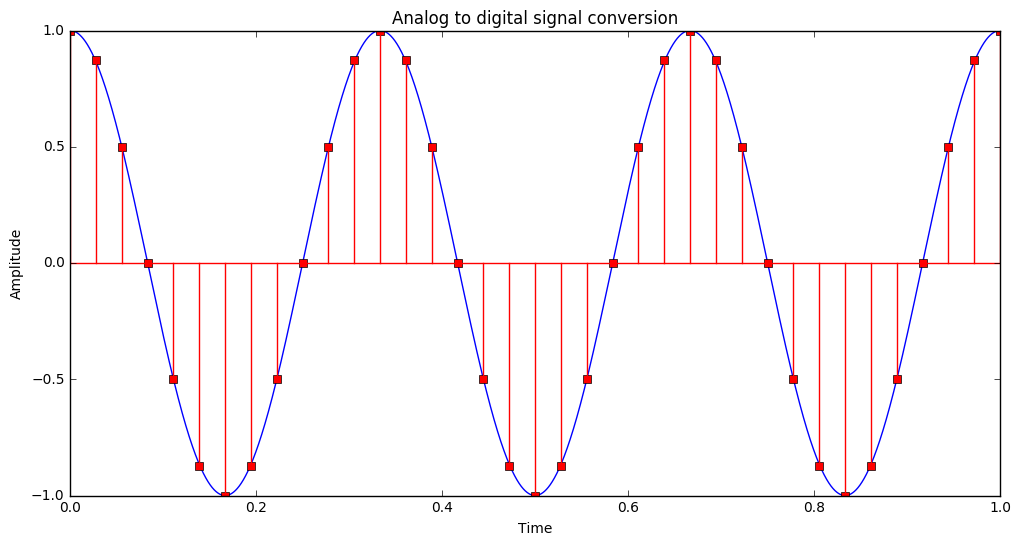

In [45]:
import numpy as np
import matplotlib.pyplot as plt

time_of_view        = 1.; # s.
analog_time         = np.linspace (0, time_of_view, 10e5); # s.

sampling_rate       = 4 * np.pi * 3; # Hz
sampling_period     = 1. / sampling_rate; # s
sample_number       = time_of_view / sampling_period;
sampling_time       = np.linspace (0, time_of_view, sample_number);

carrier_frequency   = 3.;
amplitude           = 1;
phase               = 0;

quantizing_bits     = 4;
quantizing_levels   = 2 ** quantizing_bits / 2;
quantizing_step     = 1. / quantizing_levels;

def analog_signal (time_point):
    hz_in_radians = 2 * np.pi;
    return amplitude * np.cos (hz_in_radians * carrier_frequency * time_point + phase);
sampling_signal     = analog_signal (sampling_time);
quantizing_signal   = np.round (sampling_signal / quantizing_step) * quantizing_step;


fig = plt.figure(figsize=(12, 6))
plt.plot (analog_time,   analog_signal (analog_time) );
plt.stem (sampling_time, quantizing_signal, linefmt='r-', markerfmt='rs', basefmt='r-');
plt.title("Analog to digital signal sampling")
plt.xlabel("Time")
plt.ylabel("Amplitude")

plt.show()

## Ejercicios
1. Generar una señal diferente a la utilizada en el ejemplo variando amplitud, frecuencia y/o función fundamental (Coseno).
2. Establecer un intervalo de muestreo.
3. Calcular la media y la desviación típica de la señal.
4. Realice un gráfico de los puntos evaluados.